# Лабораторная работа №2. Метаэвристические методы оптимизации

In [4]:
!conda install -c conda-forge pygmo

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
!python3 --version

Python 3.9.13


In [151]:
import pygmo as pg

import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import seaborn as sns 
import pandas as pd

### Функция Швефеля

$f(x, y) = x^2 + (x + y)^2 $, $x, y \in [-10, 10]$

Точка глобального экстремума:

$ min = (0, 0) $

Глобальный экстремум:

$ f(min) = 0$

In [4]:
class Shvefel:
    def __init__(self):
        self.dim = 2
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [x[0] * x[0] + (x[0] + x[1]) ** 2]

    def get_bounds(self):
        return ([-10] * self.dim, [10] * self.dim)

In [5]:
def check_answer_Shvefel(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2))
    print("Function value differece", f_val - f_answer)

In [6]:
prob = pg.problem(Shvefel())
print(prob) 

Problem name: <class '__main__.Shvefel'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



### Алгоритм колонии пчел для функции Швефеля

#### Для алгоритма

gen = 1: количество поколений выбираю равным одному, чтобы удобно анализировать каждую следующую эволюцию

limit = 20: максимальное количество попыток для отказа от источника

#### Для популяции

size = 20: размер популяции

In [37]:
algo = pg.algorithm(pg.bee_colony(gen = 1, limit = 50))
pop = pg.population(prob, size = 20)

In [40]:
# Количество Эволюций
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

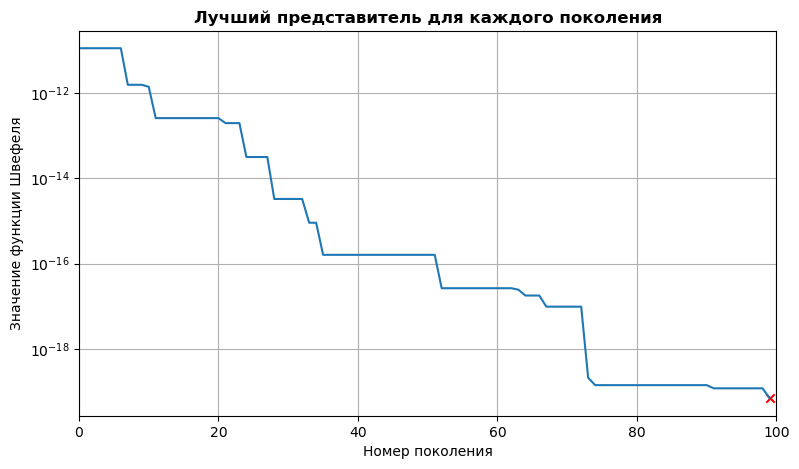

In [66]:
# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Швефеля')
ax.set_yscale('log')

plt.show()

In [67]:
x = individuals_list[np.argmin(np.array(fitness_list))]
f_val = np.min(np.array(fitness_list))

#### Результат гораздо лучше, чем у любого градиентного метода

In [68]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 2.727825065840841e-10
Function value differece 6.855788526488013e-20


### Алгоритм серых волков для функции Швефеля

In [91]:
algo = pg.algorithm(pg.gwo(gen = 10))
pop = pg.population(prob, size = 5)

In [92]:
# Количество Эволюций
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

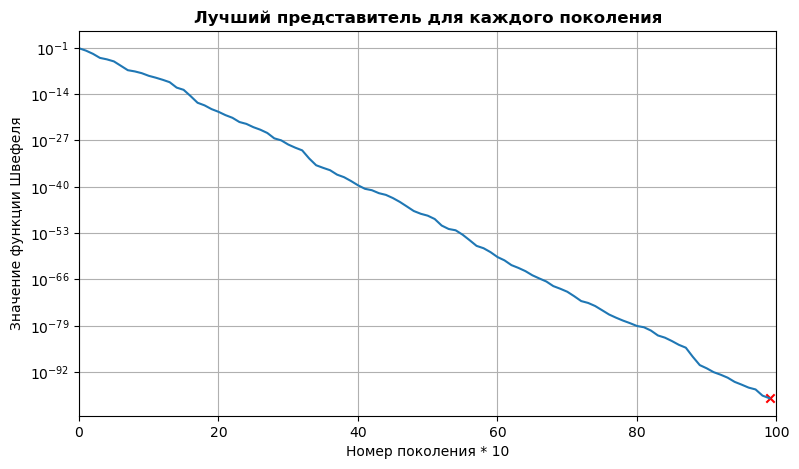

In [94]:
# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения * 10')
ax.set_ylabel(r'Значение функции Швефеля')
ax.set_yscale('log')

plt.show()

In [95]:
x = individuals_list[np.argmin(np.array(fitness_list))]
f_val = np.min(np.array(fitness_list))

#### Результат даже лучше, чем у колонии пчел

In [96]:
check_answer_Shvefel(x, f_val)

Distance to the answer point 3.5402349888859094e-50
Function value differece 4.787691699916442e-100


### Мультифункция 

$f(x, y) = x * sin(4\pi x) + y * sin(4\pi y)$, $x, y \in [-2, 2]$



Точки глобального экстремума:

$ min_1 = (-1.6288, -1.6288) $

$ min_2 = (1.6288, 1.6288) $

$ min_3 = (-1.6288, 1.6288) $

$ min_4 = (1.6288, -1.6288) $

Глобальный экстремум:

$ f(min) = 4.2539$

In [98]:
class Multifunc:
    def __init__(self):
        self.dim = 2
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [-x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])]

    def get_bounds(self):
        return ([-2] * self.dim, [2] * self.dim)

In [99]:
def check_answer_multifunc(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''
    
    x_list = [np.array([-1.6288, -1.6288]), np.array([-1.6288, 1.6288]),
                np.array([1.6288, -1.6288]), np.array([1.6288, 1.6288])]
    f_answer = -4.2539
    
    min_dist = min([math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2) for x_answer in x_list])

    print("Distance to the answer point", min_dist)
    print("Function value differece", f_val - f_answer)

In [100]:
prob = pg.problem(Multifunc())
print(prob) 

Problem name: <class '__main__.Multifunc'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-2, -2]
	Upper bounds: [2, 2]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



### Алгоритм колонии пчел для мультифункции

In [110]:
algo = pg.algorithm(pg.bee_colony(gen = 1, limit = 50))
pop = pg.population(prob, size = 20)

In [111]:
# Количество Эволюций
number_of_evolutions = 50

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

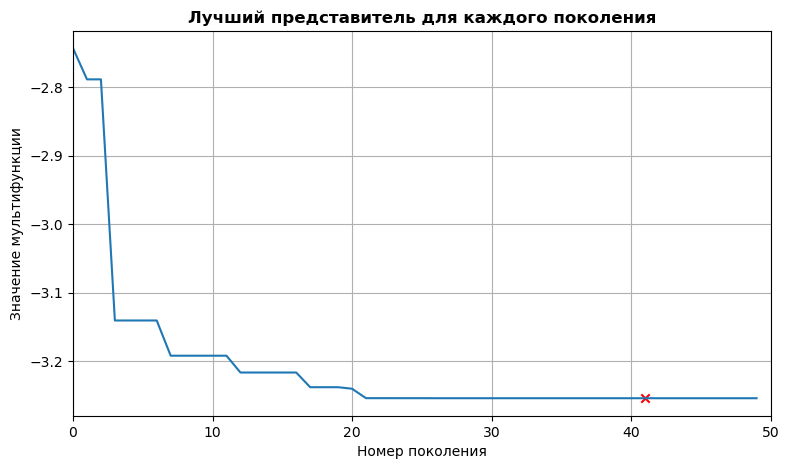

In [113]:
# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение мультифункции')
#ax.set_yscale('log')

plt.show()

In [114]:
x = individuals_list[np.argmin(np.array(fitness_list))]
f_val = np.min(np.array(fitness_list))

#### Чудеса, метод прекрасно показал себя для мультифункции

In [115]:
check_answer_multifunc(x, f_val)

Distance to the answer point 0.0002252516215955149
Function value differece 1.0000245012337152


### Алгоритм серых волков для мультифункции

In [138]:
algo = pg.algorithm(pg.gwo(gen = 10))
pop = pg.population(prob, size = 25)

In [139]:
# Количество Эволюций
number_of_evolutions = 50

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

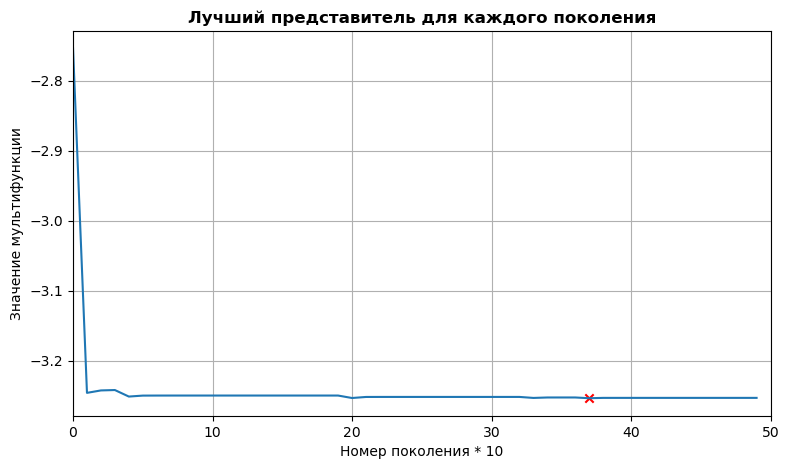

In [140]:
# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения * 10')
ax.set_ylabel(r'Значение мультифункции')

plt.show()

In [141]:
x = individuals_list[np.argmin(np.array(fitness_list))]
f_val = np.min(np.array(fitness_list))

#### Результат почти идентичен полученному с помощью колонии пчел

In [142]:
check_answer_multifunc(x, f_val)

Distance to the answer point 0.001783589821418396
Function value differece 1.0003892442439906


### Решение своей задачи
Трансформация изображения в поверхность и поиск на ней минимума

(186, 330)


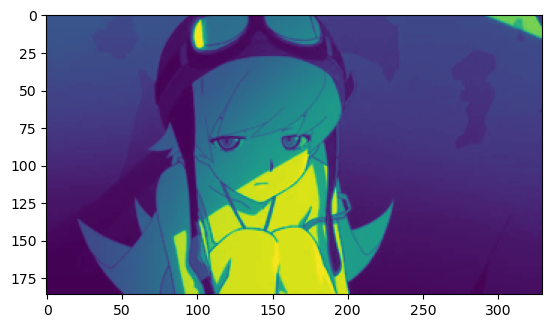

In [19]:
img_path = "./media/Bakenobu.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img.shape)

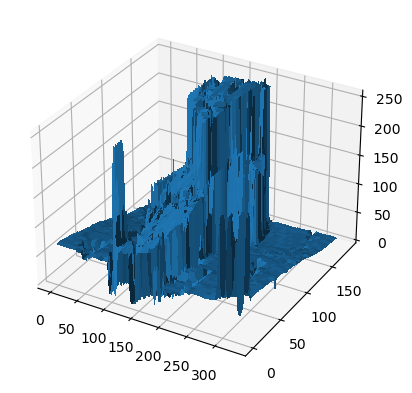

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
X = np.arange(0, 330, 1)
Y = np.arange(0, 186, 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, img, linewidth=0, antialiased=False)
plt.show()

In [39]:
class Image:
    def __init__(self, img):
        self.dim = 2
        self.data = img
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.data[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0] * self.dim, [185, 329])

In [40]:
prob = pg.problem(Image(img))
print(prob) 

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [185, 329]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [41]:
#Алгоритм колонии пчел
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob, size = 5)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.]


Очевидно, минимальное значение 0. Алгоритм сработал

### Использование параллелизма через Island

In [144]:
prob = pg.problem(Multifunc())
print(prob) 
isl = pg.island(algo = algo, prob = prob, size=20, udi=pg.thread_island())

Problem name: <class '__main__.Multifunc'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-2, -2]
	Upper bounds: [2, 2]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [145]:
isl.evolve()

In [161]:
res = []
x_res = []

for i in range(100):
    islands = [pg.island(algo = algo, prob = prob, size=20, seed=32) for effe in [0.3,0.5,0.7,0.9] for cross in [0.3,0.5,0.7,0.9]]
    _ = [isl.evolve() for isl in islands] 
    _ = [isl.wait() for isl in islands]
    res.append([isl.get_population().champion_f[0] for isl in islands])
    x_res.append([isl.get_population().champion_x[0] for isl in islands])

x = x_res[np.argmin(np.array(res))]
f_val = min(res)[0]

In [162]:
print(f_val)

-2.7443749200506975


In [163]:
check_answer_multifunc(x, f_val)

Distance to the answer point 0.012650516546756115
Function value differece 1.5095250799493023
